In [ ]:
import numpy as np

# LxL 크기의 인덱스 행렬을 생성하여 반환하는 함수
def index_matrix(L):
    return np.arange(L*L).reshape(L, L)

# 1. LxL 크기의 랜덤 스핀 행렬을 생성하여 반환하는 함수
def S(L):
    return np.random.choice([-1, 1], size=(L, L))

# 2. 주어진 행렬에서 임의의 하나의 스핀을 뒤집은 행렬을 반환하는 함수
def single_spin_flip(matrix):
    # 행렬을 1차원으로 펼친 후 뒤집을 스핀의 인덱스를 선택
    spin_matrix = matrix.copy().reshape(1, N)
    spin_index = np.random.choice(N)
    # 선택된 스핀을 뒤집음
    spin_matrix[0][spin_index] *= -1
    return spin_matrix.reshape(L, L)

# 특정 위치의 스핀과 그 이웃들의 인덱스를 반환하는 함수
def neighbor(number):
    i, j = divmod(number, L)
    neighbors_index = [(i, (j-1)%L), (i, (j+1)%L), ((i-1)%L, j), ((i+1)%L, j)]
    return [(i*L+j) for i, j in neighbors_index]

# 3. 주어진 스핀 행렬의 에너지를 계산하는 함수
def energy(spin_matrix):
    energy = 0
    for i in range(N):
        neighbors = neighbor(i)
        neighbor_right_and_below = [neighbors[1], neighbors[3]]
        for neighbor_index in neighbor_right_and_below:
            if spin_matrix[i//L][i%L] == spin_matrix[neighbor_index//L][neighbor_index%L]:
                energy -= 1
            else:
                energy += 1
    return energy

# 두 에너지 수준을 받아서 메트로폴리스 조건에 따라 허락할지 결정하는 함수
def accept(E1, E2):
    if E1 >= E2 or np.random.random() < np.exp(beta*(E1-E2)):
        return 1
    else:
        return 0

# 4. 주어진 행렬의 전체 스핀 값의 평균을 계산하여 반환하는 함수
def m(matrix):
    return np.sum(matrix)/N

# 메트로폴리스 알고리즘을 사용하여 메인 함수에서 평균과 에너지 리스트를 생성하는 함수
def make_list(beta):
    m_list = []
    E_list = []
    SL = S(L)  # 초기 스핀 행렬 생성
    n = 10000  # 반복 횟수
    for _ in range(n):
        flip_SL = single_spin_flip(SL)  # 랜덤 스핀 뒤집기
        E_mu = energy(SL)  # 현재 스핀 행렬의 에너지 계산
        E_nu = energy(flip_SL)  # 뒤집힌 스핀 행렬의 에너지 계산
        if accept(E_mu, E_nu) == 1:  # 메트로폴리스 알고리즘으로 허락된 경우 스핀 행렬 업데이트
            SL = flip_SL
        m_list.append(m(SL))  # 현재 스핀 행렬의 평균 값 리스트에 추가
        E_list.append(E_mu)  # 현재 스핀 행렬의 에너지 값 리스트에 추가
    return m_list, E_list

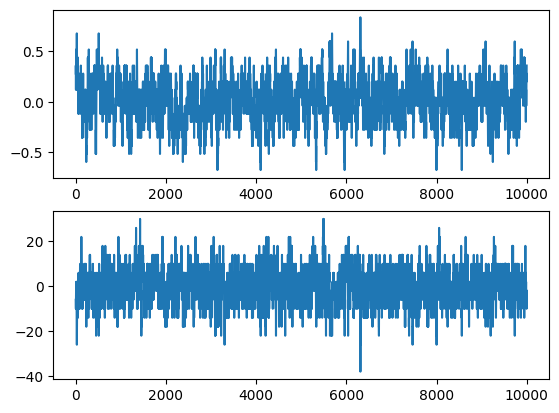

In [ ]:
import matplotlib.pyplot as plt

# beta가 0일 때
L = 5
N = L**2
beta = 0

m_list, E_list = make_list(beta)

plt.subplot(211)
plt.plot(m_list)
plt.subplot(212)
plt.plot(E_list)
plt.show()

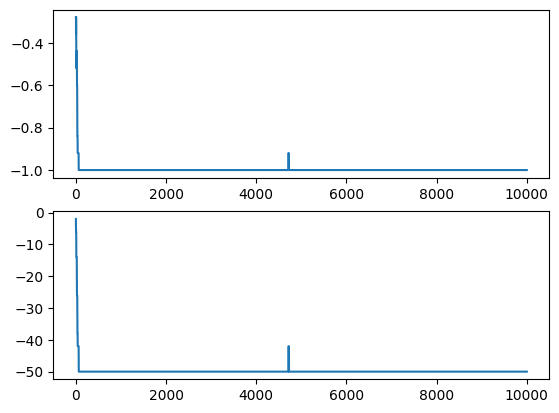

In [ ]:
# beta가 1일 때
L = 5
N = L**2
beta = 1

m_list, E_list = make_list(beta)

plt.subplot(211)
plt.plot(m_list)
plt.subplot(212)
plt.plot(E_list)
plt.show()

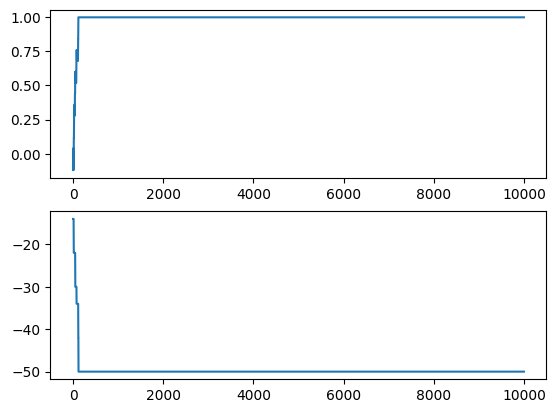

In [ ]:
# beta가 10일 때
L = 5
N = L**2
beta = 10

m_list, E_list = make_list(beta)

plt.subplot(211)
plt.plot(m_list)
plt.subplot(212)
plt.plot(E_list)
plt.show()